**2.1 Exercise - 1:**

1. Read and display the image.
• Read the image using the Pillow library and display it.
• You can also use matplotlib to display the image.

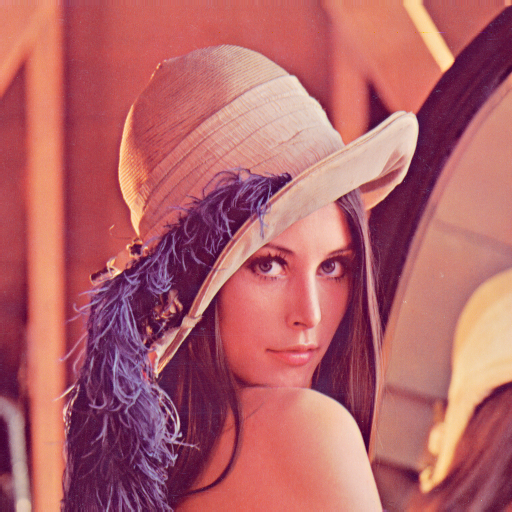

In [5]:
from PIL import Image

image_path = "/content/drive/MyDrive/Colab Notebooks/Lenna_(test_image).png"
img = Image.open(image_path)

display(img)

2. Display only the top left corner of 100x100 pixels.
• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

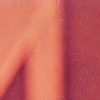

In [6]:
from PIL import Image
import numpy as np

img = Image.open(image_path)

img_array = np.array(img)

top_left_corner = img_array[:100, :100]

cropped_img = Image.fromarray(top_left_corner)

display(cropped_img)


3. Show the three color channels (R, G, B).
• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

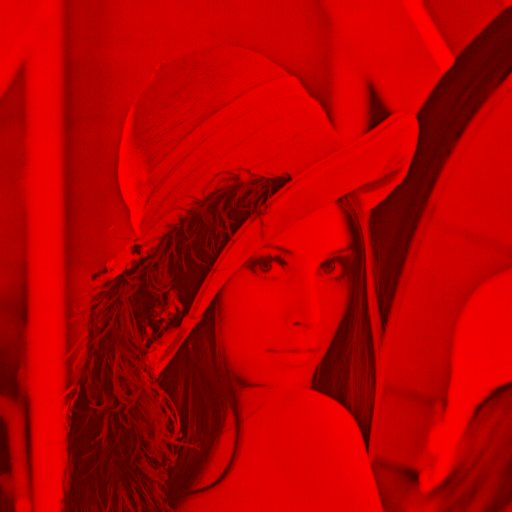

In [8]:
from PIL import Image
import numpy as np

img = Image.open(image_path)

img_array = np.array(img)

r_channel = img_array.copy()
r_channel[:, :, 1:] = 0  # Keep only the red channel

g_channel = img_array.copy()
g_channel[:, :, [0, 2]] = 0  # Keep only the green channel

b_channel = img_array.copy()
b_channel[:, :, :2] = 0  # Keep only the blue channel

r_image = Image.fromarray(r_channel)
g_image = Image.fromarray(g_channel)
b_image = Image.fromarray(b_channel)

display(r_image)



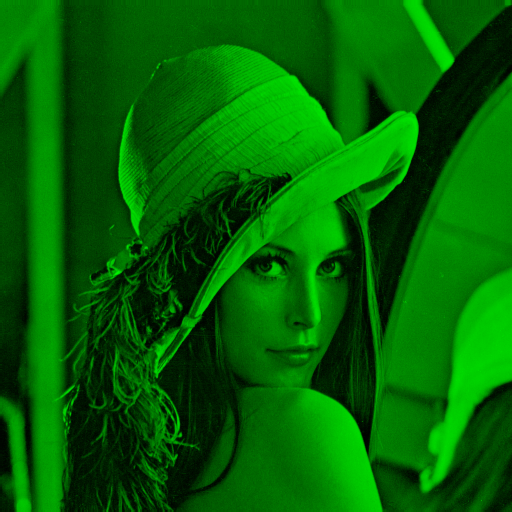

In [9]:
display(g_image)

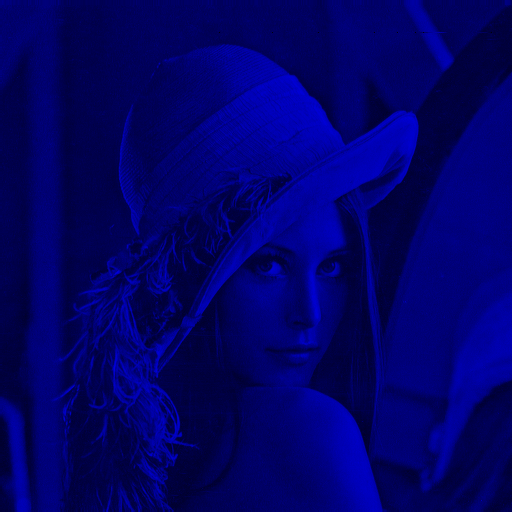

In [10]:
display(b_image)

4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:
• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

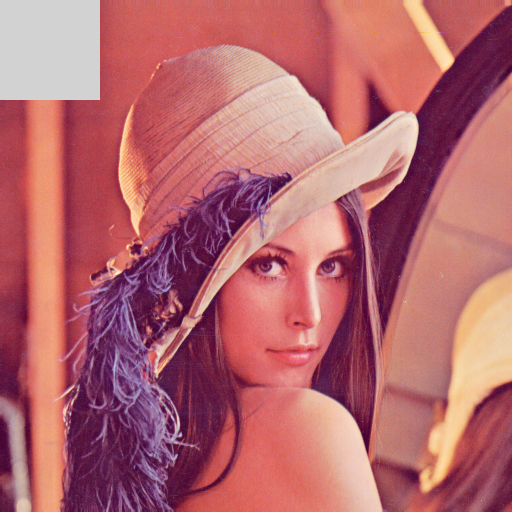

In [11]:
from PIL import Image
import numpy as np

img = Image.open(image_path)

img_array = np.array(img)

img_array[:100, :100] = 210  # Set top-left 100x100 pixels to light gray

modified_img = Image.fromarray(img_array)

display(modified_img)


**2.2 Exercise - 2:**

1. Load and display a grayscale image.
• Load a grayscale image using the Pillow library.
• Display the grayscale image using matplotlib.

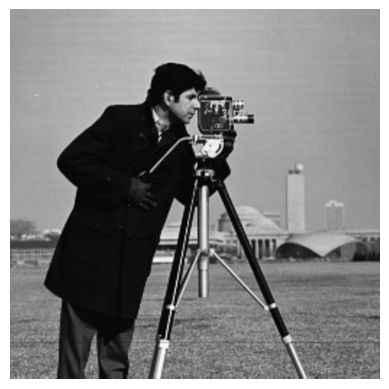

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "/content/drive/MyDrive/Colab Notebooks/cameraman.png"
img = Image.open(image_path)

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()


2. Extract and display the middle section of the image (150 pixels).
• Extract a 150 pixel section from the center of the image using NumPy array slicing.
• Display this cropped image using matplotlib.

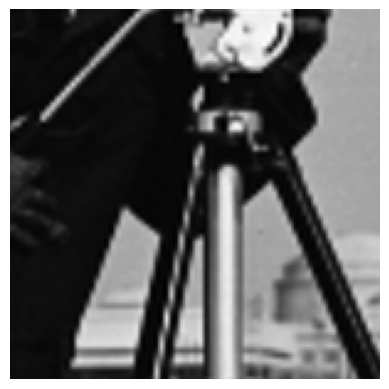

In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open(image_path)

img_array = np.array(img)

height, width = img_array.shape

start_x = (width - 150) // 2
start_y = (height - 150) // 2

cropped_section = img_array[start_y:start_y+150, start_x:start_x+150]

cropped_img = Image.fromarray(cropped_section)

plt.imshow(cropped_img, cmap="gray")
plt.axis("off")
plt.show()


3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).
• Display the resulting binary image.

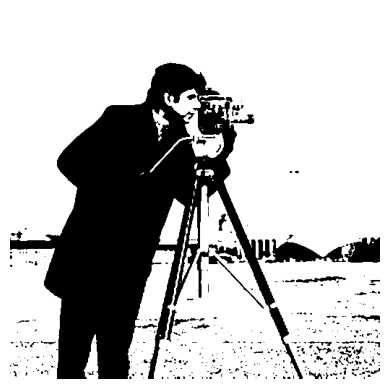

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open(image_path)

img_array = np.array(img)

threshold = 100
binary_array = np.where(img_array < threshold, 0, 255).astype(np.uint8)

binary_img = Image.fromarray(binary_array)

plt.imshow(binary_img, cmap="gray")
plt.axis("off")
plt.show()


4. Rotate the image 90 degrees clockwise and display the result.
• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.
• Display the rotated image using matplotlib.

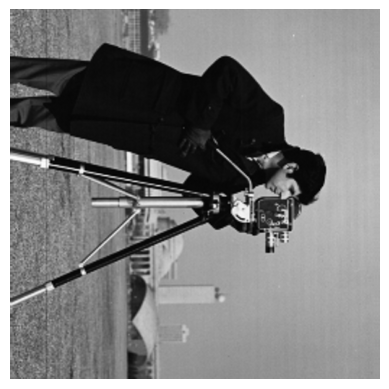

In [22]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open(image_path)

rotated_image = image.rotate(-90)

plt.imshow(rotated_image, cmap="gray")
plt.axis('off')
plt.show()


5. Convert the grayscale image to an RGB image.
• Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).
• Display the converted RGB image using matplotlib.

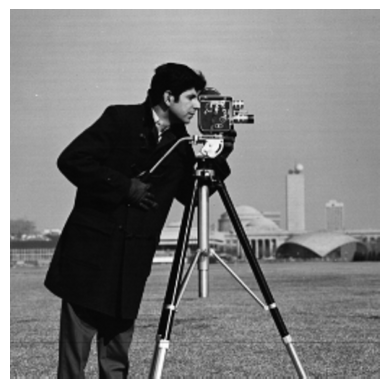

In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

grayscale_image = Image.open(image_path)

rgb_image = np.stack([np.array(grayscale_image)] * 3, axis=-1)

rgb_image_pil = Image.fromarray(rgb_image)


plt.imshow(rgb_image_pil)
plt.axis('off')
plt.show()


**3 Image Compression and Decompression using PCA.**

1. Load and Prepare Data:
• Fetch an image of you choice.{If colour convert to grayscale}
• Center the dataset - Standaridze the Data.
• Calculate the covaraince matrix of the Standaridze data.

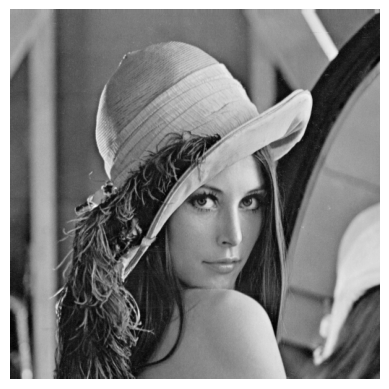

Covariance Matrix: 
 [[ 0.67592652  0.67592652  0.65760065 ... -0.20345282 -0.19127163
  -0.17274404]
 [ 0.67592652  0.67592652  0.65760065 ... -0.20345282 -0.19127163
  -0.17274404]
 [ 0.65760065  0.65760065  0.65000039 ... -0.22661402 -0.2152941
  -0.19732349]
 ...
 [-0.20345282 -0.20345282 -0.22661402 ...  1.34629876  1.33745396
   1.32274375]
 [-0.19127163 -0.19127163 -0.2152941  ...  1.33745396  1.34136651
   1.33306917]
 [-0.17274404 -0.17274404 -0.19732349 ...  1.32274375  1.33306917
   1.33995127]]


In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/Colab Notebooks/Lenna_(test_image).png'
image = Image.open(image_path)

if image.mode != 'L':
    grayscale_image = image.convert('L')
else:
    grayscale_image = image

image_array = np.array(grayscale_image)

plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

centered_data = image_array - np.mean(image_array)

standardized_data = centered_data / np.std(centered_data)

covariance_matrix = np.cov(standardized_data, rowvar=False)

print("Covariance Matrix: \n", covariance_matrix)


2. Eigen Decomposition and Identifying Principal Components:
• Compute Eigen Values and Eigen Vectors.
• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.
• Identify the Principal Components with the help of cumulative Sum plot.

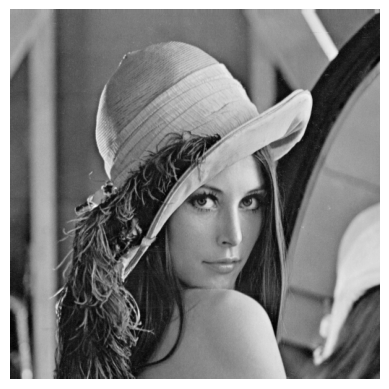

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


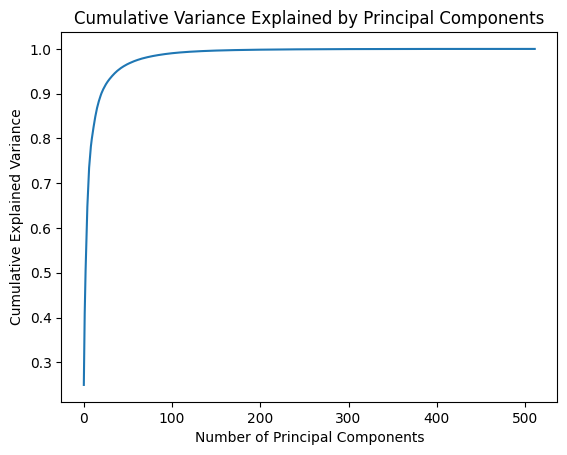

Top k Eigenvalues:  [98.60838015+0.j 62.94418847+0.j 38.07707636+0.j 30.06596802+0.j
 26.35493623+0.j 18.01129503+0.j 16.45035121+0.j  9.82544726+0.j
  8.94917849+0.j  6.40020293+0.j]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open(image_path)

if image.mode != 'L':
    grayscale_image = image.convert('L')
else:
    grayscale_image = image

image_array = np.array(grayscale_image)

plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

centered_data = image_array - np.mean(image_array)

standardized_data = centered_data / np.std(centered_data)

cov_matrix = np.cov(standardized_data, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

k = 10
top_k_eigenvectors = sorted_eigenvectors[:, :k]

cumulative_sum = np.cumsum(sorted_eigenvalues)
total_variance = cumulative_sum[-1]

plt.plot(cumulative_sum / total_variance)
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

print("Top k Eigenvalues: ", sorted_eigenvalues[:k])


3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.

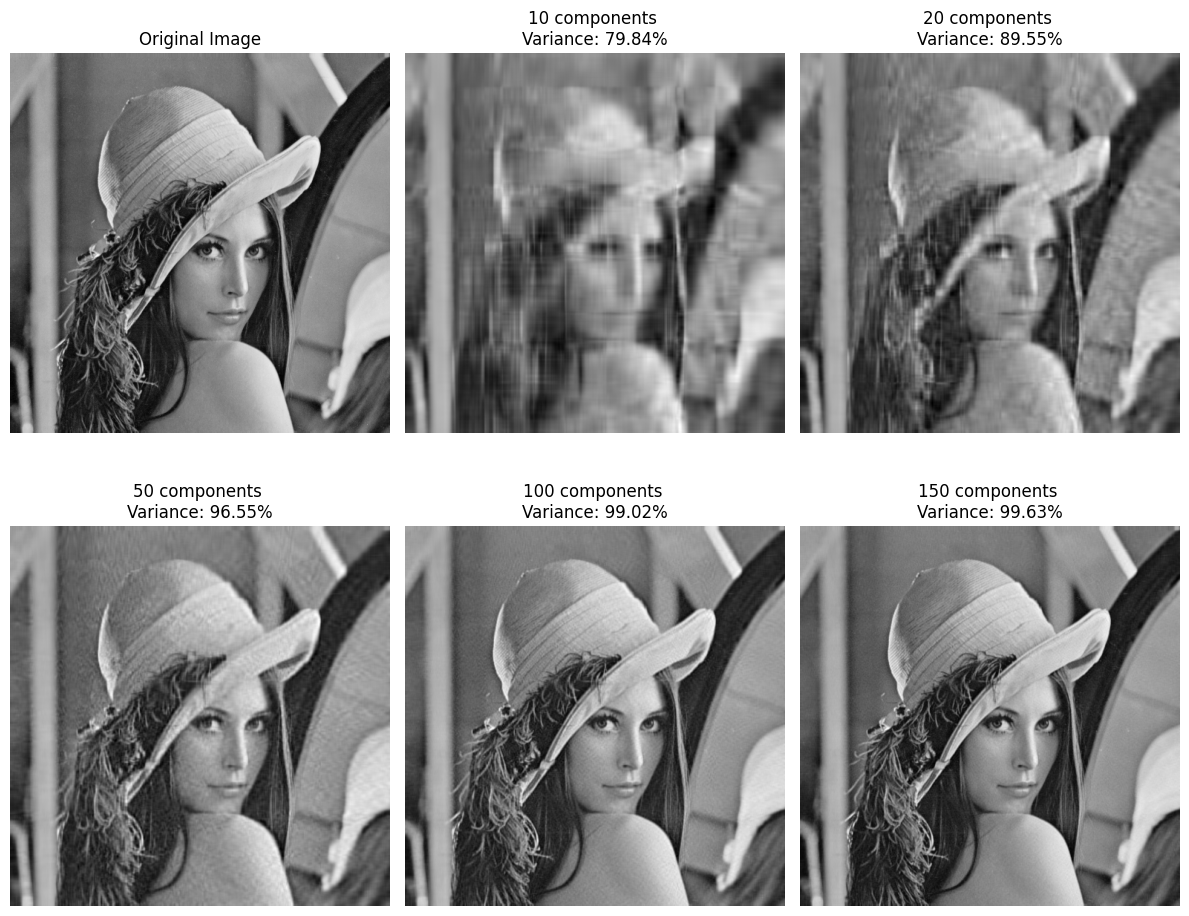

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open(image_path).convert('L')

image_array = np.array(image, dtype=np.float64)

plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

mean_image = np.mean(image_array, axis=0)
centered_data = image_array - mean_image

cov_matrix = np.cov(centered_data, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

def reconstruct_image(num_components):
    top_eigenvectors = sorted_eigenvectors[:, :num_components]
    reduced_data = np.dot(centered_data, top_eigenvectors)
    reconstructed_data = np.dot(reduced_data, top_eigenvectors.T) + mean_image
    return np.clip(reconstructed_data, 0, 255)

pc_combinations = [10, 20, 50, 100, 150]

for i, num_components in enumerate(pc_combinations, 2):
    reconstructed_image = reconstruct_image(num_components)
    explained_variance = np.sum(sorted_eigenvalues[:num_components]) / np.sum(sorted_eigenvalues) * 100

    plt.subplot(2, 3, i)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'{num_components} components \nVariance: {explained_variance:.2f}%')
    plt.axis('off')

plt.tight_layout()
plt.show()
